##### Exploratory Data Analysis of:
# Top Tech Employees' Workplace Experiance
___

**Context:** Over 67k employee reviews for Google, Amazon, Facebook, Apple, and Microsoft.

**Acknowledgements:** This data was scraped from Glassdoor.

**Questions**
- What company has been improving best?
- based on this data what company seems the best choice for a specific postion?
- is there a relationship base on stock market mometoum and volatility and employee's workplace rating?
- What pros each company is best at?
- what positions seem to be happiest in each company? (and overall)


- what proportion of employees felt comfortable enough not tobe Anonymous?
___

Scratch Notes

- Exploratory Data Analysis and Visualization for Text Data
- Create a stunning visualization
- focus of the project is on exploratory data analysis
- worthy of posting it to Medium, Kaggle
- Emplopyers and My Tech Friends value it

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://www.kaggle.com/aashita/exploratory-data-analysis-of-comments-on-nyt

https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

Table of contents:
1. [Importing modules and loading data ](#import)

## Importing modules and loading data <a name="import"></a>

1. First we import python modules and setting notebook environment

In [2]:
# Essential Data Analysis Ecosystem Libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

# From Python Standard Library
import os  # os file operations
import re  # regular experesion  for data cleaning

# set plots to be embedded inline
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

2. import the dataset

In [3]:
# dataset starting file(s)
dataset_path = 'input/'
print ('Dataset file(s):', os.listdir(dataset_path))

# TODO: Programmatically download the dataset zip file from Kaggle.

df = pd.read_csv(os.path.join(dataset_path, 'employee_reviews.csv'))

Dataset file(s): ['employee_reviews.csv']


## First look at the data:<a name="import"></a>

#### Let's look at shape of our data and 3 random observations (reviews):

In [4]:
print('Number of rows (reviews) and columns:', df.shape)
df.sample()

Number of rows (reviews) and columns: (67529, 17)


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
38852,38853,apple,"New York, NY","Jun 17, 2017",Former Employee - Product Zone Specialist,Product Zone,The benefits at Apple for employees are amazin...,Working for Apple was better a few years back....,The managers that use to work at Apple and und...,4.0,5.0,5.0,4.0,5.0,5.0,2,https://www.glassdoor.com/Reviews/Apple-Review...


#### Information about columns by data provider:

This dataset contains employee reviews separated into the following categories. 
> Comments in blue are data tidiness and quality issues that we will fix before start exploring the data.

##### Columns
- Index: index
- - <font color='blue'> Unnamed column is redundant. Same as index. To be dropped</font>
- Company: Company name
- Location : This dataset is global, as such it may include the country's name in parenthesis i.e "Toronto, ON(Canada)". However, if the location is in the USA then it will only include the city and state i.e "Los Angeles, CA".
- - <font color='blue'> Tidiness issue: location column contains 3 different 'city, state, and country' values. This column is to be separated in 3 columns.</font>
- Date Posted: in the following format MM DD, YYYY
- Job-Title: This string will also include whether the reviewer is a 'Current' or 'Former' Employee at the time of the review
- - <font color='blue'> Tidiness issue: employee_status (current or former) and job_title are to be seperated in two columns.</font>
- Summary: Short summary of employee review
- Pros: Pros
- Cons: Cons
- Overall Rating: 1-5
- Work/Life Balance Rating: 1-5
- Culture and Values Rating: 1-5
- Career Opportunities Rating: 1-5
- Comp & Benefits Rating: 1-5
- Senior Management Rating: 1-5
- Helpful Review Count: A count of how many people found the review to be helpful
- Link to Review : This will provide you with a direct link to the page that contains the review. However it is likely that this link will be outdated

NOTE: 'none' is placed in all cells where no data value was found.



#### Information about the columns' names, datatypes, unique values, and null values:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [7]:
df.nunique()

Unnamed: 0                    67529
company                           6
location                       2044
dates                          3824
job-title                      8308
summary                       42649
pros                          66085
cons                          66049
advice-to-mgmt                35190
overall-ratings                   5
work-balance-stars               10
culture-values-stars              6
carrer-opportunities-stars       10
comp-benefit-stars               10
senior-mangemnet-stars           10
helpful-count                    99
link                           6754
dtype: int64

#### Data Wrangling
- Unnamed column is index same as DataFrame index; To be dropped

In [6]:
df.location.value_counts()[:10]

none                    25085
Redmond, WA              5613
Seattle, WA              4963
Hyderabad (India)        2150
Mountain View, CA        1706
Bengaluru (India)        1607
Cupertino, CA            1291
New York, NY             1152
London, England (UK)      930
Menlo Park, CA            805
Name: location, dtype: int64

In [8]:
df.location.sample(10)

41528            Jacksonville, FL
64443      Vancouver, BC (Canada)
5463         London, England (UK)
32199    Gurgaon, Haryana (India)
14105                 Seattle, WA
211                          none
59025                 Redmond, WA
25747                        none
16657                        none
45613                        none
Name: location, dtype: object

In [9]:
# Tidiness
# functions to make extrat "city, state, and country" values from location column 
# to 3 columns


btween_parentheses = r'\(([^)]+)\)'  # Regular expression to get a string between parentheses


def get_country(location):
    """Extracts and returns country name from location string.
    Returns Nan if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        return not_usa[0]
    else:
        return 'USA'
    

def get_state(location):
    """Extracts and returns state name (if aby) from location string.
    Returns Nan if 'none or not applicable."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[1].split()[0]
        else:
            return np.nan
    else:
        return location.strip()[-2:]

    
def get_city(location):
    """Extracts and returns city name from location string.
    Returns Nan if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[0]
        else:
            return location.split()[0]
    else:
        return location.split(',')[0]    

In [10]:
df['city'] = df.location.apply(get_city)
df['state'] = df.location.apply(get_state)
df['country'] = df.location.apply(get_country)

In [11]:
df.rename(columns={'dates': 'date',
                   'advice-to-mgmt': 'advice_to_mgmt',
                   'overall-ratings': 'r_overall',
                   'work-balance-stars': 'r_work_balance',
                   'culture-values-stars': 'r_culture',
                   'carrer-opportunities-stars': 'r_career_opp',
                   'comp-benefit-stars': 'r_comp_benefit',
                   'senior-mangemnet-stars': 'senior_mangemnet',
                   'helpful-count': 'helpful_count'}, inplace=True);

In [12]:
# def is_curr_emp(column):
#     """"""
#     if not column or column == 'none':
#         return np.nan
    
#     return True if column.split()[0] == 'Current' else False


# def get_job_title(column):
#     if not column or column == 'none':
#         return np.nan

#     return column.split('-')[1]


df['current_emp'] = df['job-title'].apply(lambda column: True if column.split()[0] == 'Current' else False)
df['job_title'] = df['job-title'].apply(lambda column: column.split('-')[1])

In [13]:
drop_columns = ['Unnamed: 0', 'location', 'job-title']
df.drop(columns=drop_columns, axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 19 columns):
company             67529 non-null object
date                67525 non-null datetime64[ns]
summary             67409 non-null object
pros                67529 non-null object
cons                67529 non-null object
advice_to_mgmt      67232 non-null object
r_overall           67529 non-null int64
r_work_balance      67529 non-null object
r_culture           53983 non-null float64
r_career_opp        60421 non-null float64
r_comp_benefit      67529 non-null object
senior_mangemnet    67529 non-null object
helpful_count       67529 non-null int64
link                67529 non-null object
city                42444 non-null object
state               34403 non-null object
country             42444 non-null object
current_emp         67529 non-null bool
job_title           67529 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(13)
memory usage: 9.3+

In [15]:
# Data Types:
df.date = pd.to_datetime(df.date, errors='coerce')

In [18]:
#star_rating = pd.api.types.CategoricalDtype(ordered=True, categories=['*', '**', '***', '****', '*****'])

# df.r_overall = df.r_overall.astype(star_rating)
# df.r_culture = df.r_culture.astype(star_rating)
# df.r_career_opp = df.r_career_opp.astype(star_rating)
# df.r_comp_benefit = df.r_comp_benefit.astype(star_rating)
# df.r_work_balance = df.r_work_balance.astype(star_rating)


df.r_overall = df.r_overall.astype('int')
df.r_culture = pd.to_numeric(df.r_culture, errors='coerce', downcast='unsigned')
df.r_career_opp = pd.to_numeric(df.r_career_opp, errors='coerce', downcast='unsigned')
df.r_comp_benefit = df.r_comp_benefit.astype('int', errors='ignore')


In [19]:
df.r_career_opp.value_counts(normalize=True)

5.0    0.300607
4.0    0.275947
3.0    0.219410
2.0    0.102133
1.0    0.075057
3.5    0.011767
2.5    0.006537
4.5    0.006438
1.5    0.002102
Name: r_career_opp, dtype: float64

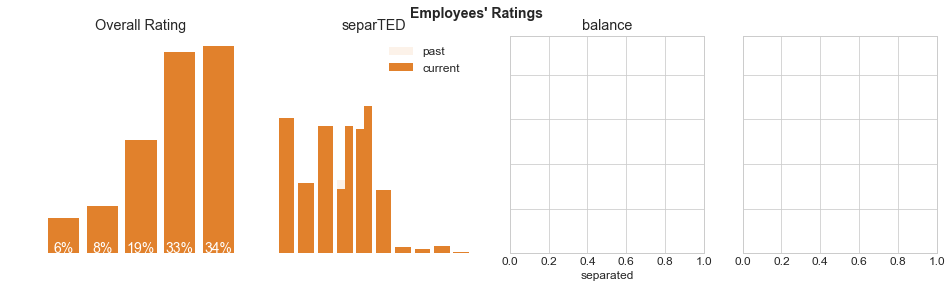

In [21]:
# Choose a available style for rendering plots
plt.style.use('seaborn-whitegrid')

# Create the figure and axes and get access to them
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(16, 4))

# Title the figure
fig.suptitle('Employees\' Ratings', fontsize=14, fontweight='bold')

plt.rcParams.update({'font.size': 12})


x = 'r_overall'
hue = 'current_emp'
color = sns.color_palette()[1]


sns.countplot(ax=ax1, data=df, x=x, hue=None, color=color)
ax1.set(title='Overall Rating', xlabel='combined', ylabel='')
ax1.set_axis_off()

sns.countplot(ax=ax2, data=df, x=x, hue=hue, color=color)
ax2.set(title='separTED', xlabel='separated', ylabel='')
ax2.legend(['past', 'current'])
ax2.set_axis_off()


sns.countplot(ax=ax2, data=df, x=df.r_work_balance, color=color)
ax3.set(title='balance', xlabel='separated', ylabel='')
ax3.legend(['past', 'current'])
# ax3.set_axis_off()

locs = ax1.get_xticks()
labels = ax1.get_xlabel()

counts = list(df.r_overall.value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):
    
    text = '{:0.0f}%'.format(100*count)
    ax1.text(loc, 0, text, color='w', ha='center', fontsize=14)
    
# ax1.set(title='Employee Overall Rating', xlabel='rating', ylabel='')

### Missing Data

In [44]:
# Convert misrepresentations of missing values to NaN
df.replace('none', np.nan, inplace=True)  # replace any value 'none' to NaN

In [135]:
col_missing_counts = df.isnull().sum()  # create a table with the number of missing values in each column.
col_missing_counts = col_missing_counts[col_missing_counts !=0]  # keep columns with missing values only
col_missing_counts

date                    4
summary               129
cons                    1
advice_to_mgmt      29461
r_work_balance       7160
r_culture           13546
r_career_opp         7108
r_comp_benefit       7161
senior_mangemnet     7775
city                25085
state               33126
country             25085
dtype: int64

In [101]:
print(type(df.isnull().sum().index))
df.isnull().sum().index

<class 'pandas.core.indexes.base.Index'>


Index(['company', 'date', 'summary', 'pros', 'cons', 'advice_to_mgmt',
       'r_overall', 'r_work_balance', 'r_culture', 'r_career_opp',
       'r_comp_benefit', 'senior_mangemnet', 'helpful_count', 'link', 'city',
       'state', 'country', 'current_emp', 'job_title'],
      dtype='object')

In [102]:
print(type(df.isnull().sum().index.values))
df.isnull().sum().index.values

<class 'numpy.ndarray'>


array(['company', 'date', 'summary', 'pros', 'cons', 'advice_to_mgmt',
       'r_overall', 'r_work_balance', 'r_culture', 'r_career_opp',
       'r_comp_benefit', 'senior_mangemnet', 'helpful_count', 'link',
       'city', 'state', 'country', 'current_emp', 'job_title'],
      dtype=object)

In [100]:
type(df.isnull().sum().values)

numpy.ndarray

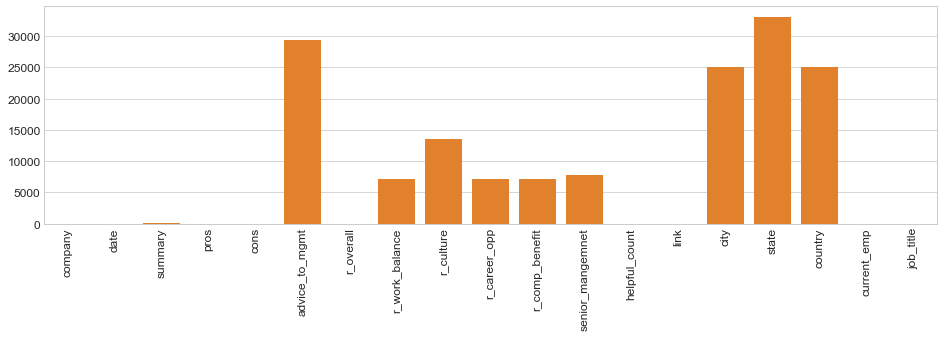

In [104]:
fig, ax = plt.subplots(figsize=(16, 4))

x = df.isnull().sum().index.values
y = df.isnull().sum()
sns.barplot(x, y, color=color, ax=ax)
plt.xticks(rotation=90);

In [111]:
idx = df.r_work_balance.value_counts().index; idx

Index(['4.0', '5.0', '3.0', '2.0', '1.0', '3.5', '4.5', '2.5', '1.5'], dtype='object')

In [122]:
if '1.5' in idx:
    print(idx.values)


['4.0' '5.0' '3.0' '2.0' '1.0' '3.5' '4.5' '2.5' '1.5']


In [129]:
df.isnull().sum()[df.isnull().sum() != 0]

date                    4
summary               129
cons                    1
advice_to_mgmt      29461
r_work_balance       7160
r_culture           13546
r_career_opp         7108
r_comp_benefit       7161
senior_mangemnet     7775
city                25085
state               33126
country             25085
dtype: int64